# Q-Learning: From Basics to Implementation

## What is Q-Learning?

Q-Learning is a model-free reinforcement learning algorithm that learns the value of actions in different states. The goal is to learn a policy that tells an agent which action to take to maximize cumulative reward.

**The "Q" stands for "quality"** — specifically, the quality of taking a particular action in a particular state.

### Core Concepts

- **State (s)**: The current situation the agent is in
- **Action (a)**: A choice the agent can make
- **Reward (r)**: Immediate feedback from taking an action
- **Episode**: A complete sequence from start to terminal state

---

## The Q-Table

The Q-table is a lookup table where rows are states and columns are actions. Each cell Q(s,a) represents the expected future reward for taking action `a` in state `s`.


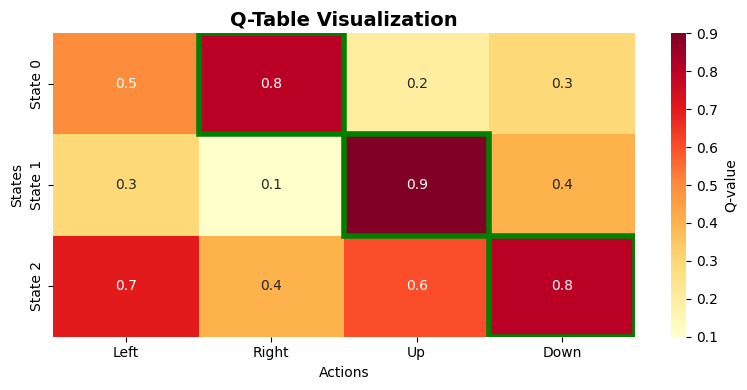

Green borders show the best action for each state (the learned policy)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example Q-table
q_table = np.array([
    [0.5, 0.8, 0.2, 0.3],  # State 0
    [0.3, 0.1, 0.9, 0.4],  # State 1
    [0.7, 0.4, 0.6, 0.8],  # State 2
])

# Visualize the Q-table
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(q_table, annot=True, fmt='.1f', cmap='YlOrRd', 
            xticklabels=['Left', 'Right', 'Up', 'Down'],
            yticklabels=['State 0', 'State 1', 'State 2'],
            cbar_kws={'label': 'Q-value'}, ax=ax)
ax.set_title('Q-Table Visualization', fontsize=14, fontweight='bold')
ax.set_xlabel('Actions')
ax.set_ylabel('States')

# Highlight best actions with green borders
for i in range(q_table.shape[0]):
    best_action = np.argmax(q_table[i])
    ax.add_patch(plt.Rectangle((best_action, i), 1, 1, fill=False, 
                                edgecolor='green', lw=4))

plt.tight_layout()
plt.show()

print("Green borders show the best action for each state (the learned policy)")

---

## The Q-Learning Update Rule

This is the heart of Q-Learning:

### Q(s,a) ← Q(s,a) + α[r + γ·max(Q(s',a')) - Q(s,a)]

**Breaking it down:**

- **Q(s,a)**: Current Q-value for state s, action a
- **α (alpha)**: Learning rate (0 to 1) - how much new info overrides old
- **r**: Immediate reward received
- **γ (gamma)**: Discount factor (0 to 1) - how much we value future rewards
- **max(Q(s',a'))**: Maximum Q-value for the next state s'
- **r + γ·max(Q(s',a'))**: Target Q-value (what we think Q(s,a) should be)
- **[r + γ·max(Q(s',a')) - Q(s,a)]**: TD error (difference between target and current)

### Why This Works: Temporal Difference Learning

We constantly adjust our estimate of Q(s,a) based on: (1) The immediate reward we got, and (2) Our best estimate of future rewards from the next state. Over many iterations, these estimates converge to the true optimal Q-values.


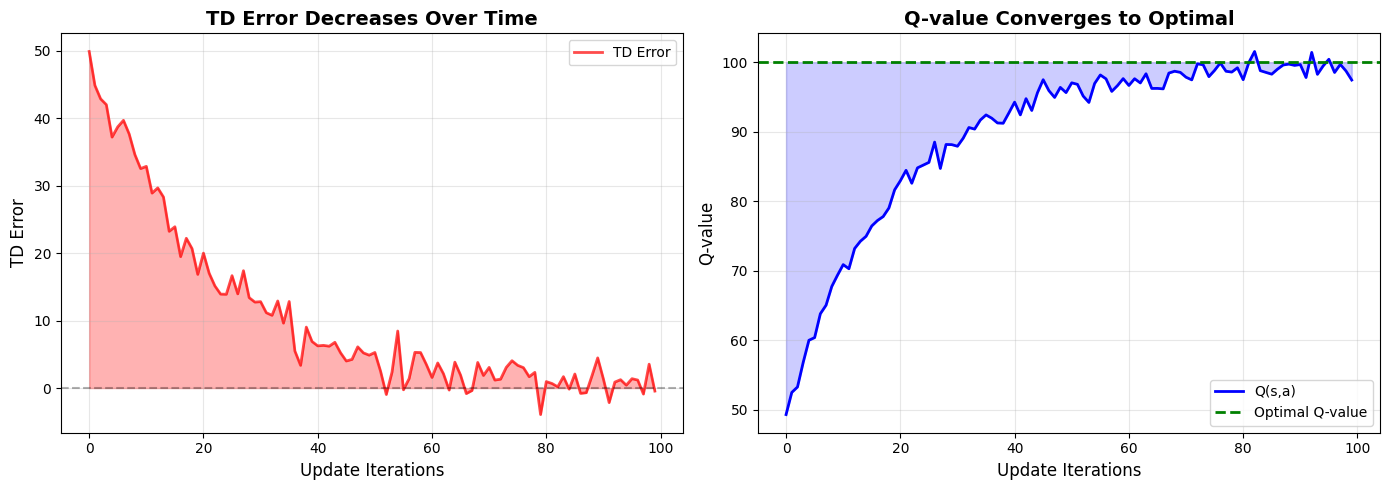

Left: TD error shrinks as estimates improve
Right: Q-values converge to optimal values


In [2]:
# Visualize the update process
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: TD Error visualization
iterations = np.arange(0, 100)
td_error = 50 * np.exp(-iterations / 20) + np.random.normal(0, 2, len(iterations))
q_values = 100 - 50 * np.exp(-iterations / 20) + np.random.normal(0, 1, len(iterations))

ax1.plot(iterations, td_error, 'r-', alpha=0.7, linewidth=2, label='TD Error')
ax1.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax1.fill_between(iterations, td_error, 0, alpha=0.3, color='red')
ax1.set_xlabel('Update Iterations', fontsize=12)
ax1.set_ylabel('TD Error', fontsize=12)
ax1.set_title('TD Error Decreases Over Time', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Right plot: Q-value convergence
ax2.plot(iterations, q_values, 'b-', linewidth=2, label='Q(s,a)')
ax2.axhline(y=100, color='g', linestyle='--', linewidth=2, label='Optimal Q-value')
ax2.fill_between(iterations, q_values, 100, alpha=0.2, color='blue')
ax2.set_xlabel('Update Iterations', fontsize=12)
ax2.set_ylabel('Q-value', fontsize=12)
ax2.set_title('Q-value Converges to Optimal', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Left: TD error shrinks as estimates improve")
print("Right: Q-values converge to optimal values")

---

## Exploration vs Exploitation: ε-Greedy

Q-Learning faces a dilemma: should the agent try new actions (explore) or stick with what works (exploit)?

**ε-greedy strategy:**
- With probability **ε**: choose a random action (explore)
- With probability **1-ε**: choose the action with highest Q-value (exploit)

Typically, start with high ε (e.g., 0.9) and decay it over time as the agent learns.


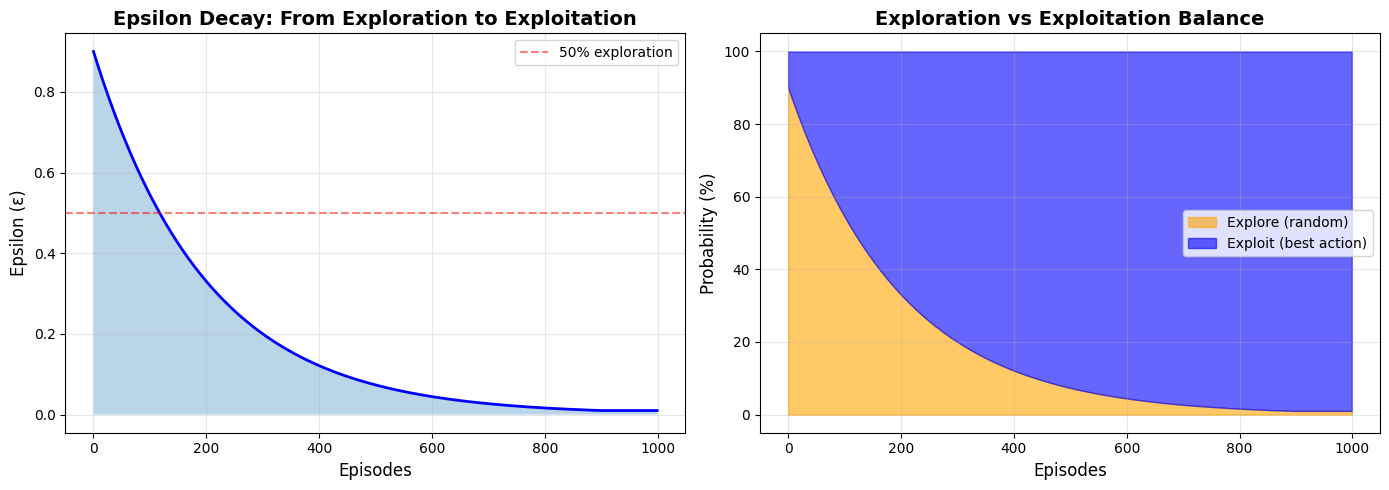

Early episodes: mostly exploration (orange)
Later episodes: mostly exploitation (blue)


In [3]:
# Visualize epsilon decay
episodes = np.arange(0, 1000)
epsilon_start = 0.9
epsilon_min = 0.01
decay_rate = 0.995

epsilon_values = [max(epsilon_min, epsilon_start * (decay_rate ** e)) for e in episodes]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: Epsilon decay curve
ax1.plot(episodes, epsilon_values, 'b-', linewidth=2)
ax1.fill_between(episodes, epsilon_values, alpha=0.3)
ax1.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='50% exploration')
ax1.set_xlabel('Episodes', fontsize=12)
ax1.set_ylabel('Epsilon (ε)', fontsize=12)
ax1.set_title('Epsilon Decay: From Exploration to Exploitation', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Right plot: Exploration vs Exploitation balance
explore_prob = np.array(epsilon_values)
exploit_prob = 1 - explore_prob

ax2.fill_between(episodes, 0, explore_prob * 100, alpha=0.6, color='orange', label='Explore (random)')
ax2.fill_between(episodes, explore_prob * 100, 100, alpha=0.6, color='blue', label='Exploit (best action)')
ax2.set_xlabel('Episodes', fontsize=12)
ax2.set_ylabel('Probability (%)', fontsize=12)
ax2.set_title('Exploration vs Exploitation Balance', fontsize=14, fontweight='bold')
ax2.legend(loc='center right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Early episodes: mostly exploration (orange)")
print("Later episodes: mostly exploitation (blue)")

---

## Key Hyperparameters

### Learning Rate (α)
Controls how much new information overrides old
- Too high: unstable, oscillates
- Too low: learns slowly
- **Typical: 0.1 to 0.5**

### Discount Factor (γ)
How much we value future rewards vs immediate
- γ = 0: only care about immediate reward (myopic)
- γ = 1: value all future rewards equally (may not converge)
- **Typical: 0.9 to 0.99**

### Exploration Rate (ε)
Balances exploration and exploitation
- Often decayed: ε = max(min_ε, ε × decay_rate)
- **Typical start: 0.9, decay to 0.01**


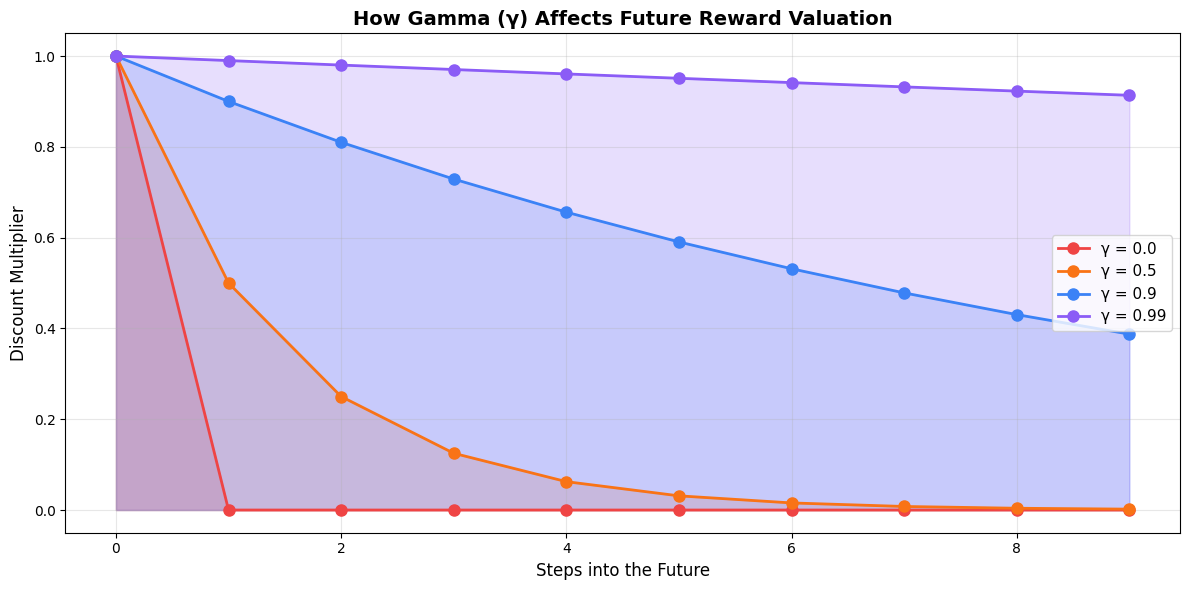

γ = 0.0: Only immediate rewards matter
γ = 0.5: Future rewards decay quickly
γ = 0.9: Balances present and future
γ = 0.99: Values long-term rewards almost equally


In [4]:

# Visualize how gamma affects future reward valuation
fig, ax = plt.subplots(figsize=(12, 6))

gammas = [0.0, 0.5, 0.9, 0.99]
steps = np.arange(0, 10)
colors = ['#ef4444', '#f97316', '#3b82f6', '#8b5cf6']

for gamma, color in zip(gammas, colors):
    discounted_values = [gamma ** step for step in steps]
    ax.plot(steps, discounted_values, marker='o', linewidth=2, 
            label=f'γ = {gamma}', color=color, markersize=8)
    ax.fill_between(steps, discounted_values, alpha=0.2, color=color)

ax.set_xlabel('Steps into the Future', fontsize=12)
ax.set_ylabel('Discount Multiplier', fontsize=12)
ax.set_title('How Gamma (γ) Affects Future Reward Valuation', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_ylim(-0.05, 1.05)

plt.tight_layout()
plt.show()

print("γ = 0.0: Only immediate rewards matter")
print("γ = 0.5: Future rewards decay quickly")
print("γ = 0.9: Balances present and future")
print("γ = 0.99: Values long-term rewards almost equally")

---

## Grid World Example

Imagine a 3×3 grid where an agent starts at the top-left and wants to reach a goal at bottom-right:


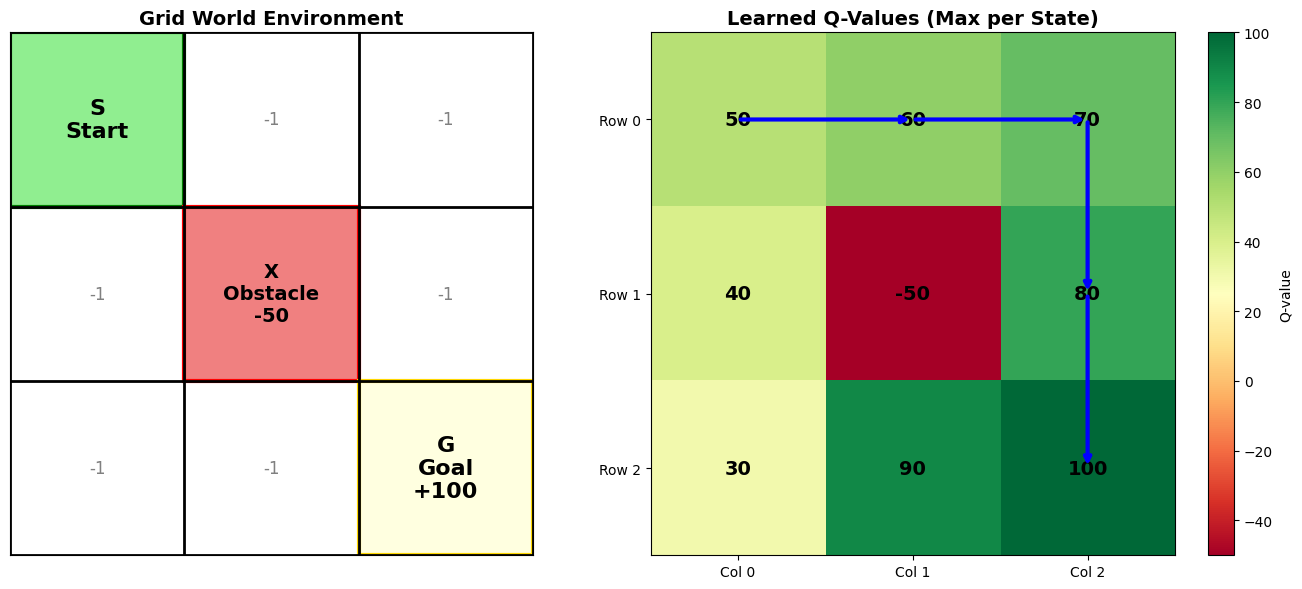

Left: Environment layout with rewards
Right: Learned values showing optimal path (blue arrows)
Agent learns to avoid obstacle and take efficient route to goal


In [5]:

import matplotlib.patches as patches

# Create the grid world
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left plot: Grid world environment
ax1.set_xlim(0, 3)
ax1.set_ylim(0, 3)
ax1.set_aspect('equal')
ax1.invert_yaxis()

# Draw grid
for i in range(4):
    ax1.axhline(y=i, color='black', linewidth=2)
    ax1.axvline(x=i, color='black', linewidth=2)

# Start position (green)
start_rect = patches.Rectangle((0, 0), 1, 1, linewidth=3, 
                                edgecolor='green', facecolor='lightgreen')
ax1.add_patch(start_rect)
ax1.text(0.5, 0.5, 'S\nStart', ha='center', va='center', 
         fontsize=16, fontweight='bold')

# Obstacle (red)
obstacle_rect = patches.Rectangle((1, 1), 1, 1, linewidth=3, 
                                   edgecolor='red', facecolor='lightcoral')
ax1.add_patch(obstacle_rect)
ax1.text(1.5, 1.5, 'X\nObstacle\n-50', ha='center', va='center', 
         fontsize=14, fontweight='bold')

# Goal (yellow)
goal_rect = patches.Rectangle((2, 2), 1, 1, linewidth=3, 
                               edgecolor='gold', facecolor='lightyellow')
ax1.add_patch(goal_rect)
ax1.text(2.5, 2.5, 'G\nGoal\n+100', ha='center', va='center', 
         fontsize=16, fontweight='bold')

# Empty cells
for (x, y) in [(1, 0), (2, 0), (0, 1), (2, 1), (0, 2), (1, 2)]:
    ax1.text(x + 0.5, y + 0.5, '-1', ha='center', va='center', 
             fontsize=12, color='gray')

ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Grid World Environment', fontsize=14, fontweight='bold')

# Right plot: Learned Q-values (heatmap showing path)
learned_values = np.array([
    [50, 60, 70],
    [40, -50, 80],
    [30, 90, 100]
])

im = ax2.imshow(learned_values, cmap='RdYlGn', aspect='auto')
ax2.set_xticks(np.arange(3))
ax2.set_yticks(np.arange(3))
ax2.set_xticklabels(['Col 0', 'Col 1', 'Col 2'])
ax2.set_yticklabels(['Row 0', 'Row 1', 'Row 2'])

# Add value annotations
for i in range(3):
    for j in range(3):
        text = ax2.text(j, i, f'{learned_values[i, j]:.0f}',
                       ha="center", va="center", color="black", fontsize=14, fontweight='bold')

# Draw optimal path
optimal_path = [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)]
for i in range(len(optimal_path) - 1):
    y1, x1 = optimal_path[i]
    y2, x2 = optimal_path[i + 1]
    ax2.annotate('', xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle='->', lw=3, color='blue'))

ax2.set_title('Learned Q-Values (Max per State)', fontsize=14, fontweight='bold')
plt.colorbar(im, ax=ax2, label='Q-value')

plt.tight_layout()
plt.show()

print("Left: Environment layout with rewards")
print("Right: Learned values showing optimal path (blue arrows)")
print("Agent learns to avoid obstacle and take efficient route to goal")

**Environment Setup:**
- **States:** 9 positions
- **Actions:** up, down, left, right
- **Rewards:** -1 per step, +100 at goal, -50 if hit obstacle

**What the Agent Learns:**
1. Moving toward the goal increases Q-values in that direction
2. Paths near the obstacle have lower Q-values
3. Eventually, Q-values form a gradient pointing to the optimal path



---

## Why Q-Learning is Powerful

**Off-Policy Learning**: Q-Learning learns the optimal policy even while following a sub-optimal one (like ε-greedy). The `max` operator in the update rule always looks for the best action, regardless of what action was actually taken.

**Model-Free**: Doesn't need to know the environment's dynamics (transition probabilities). It learns purely from experience.

**Guaranteed Convergence**: Given enough exploration and appropriate learning rate decay, Q-Learning provably converges to the optimal Q-values.


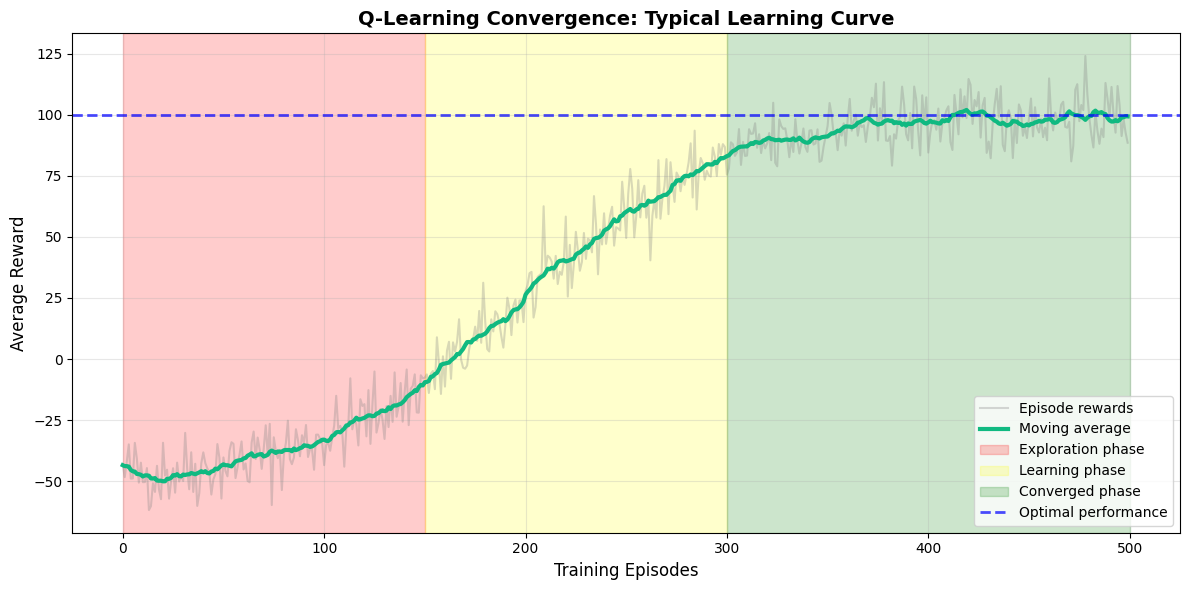

Phase 1 (Red): Random exploration, poor performance
Phase 2 (Yellow): Rapid learning, improving performance
Phase 3 (Green): Converged to near-optimal policy


In [6]:
# Visualize typical learning curve
np.random.seed(42)
episodes = np.arange(0, 500)

# Simulate learning curve with noise
avg_rewards = -50 + (150 / (1 + np.exp(-(episodes - 200) / 50))) + np.random.normal(0, 8, len(episodes))

# Smooth curve
from scipy.ndimage import uniform_filter1d
smoothed_rewards = uniform_filter1d(avg_rewards, size=20)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot raw rewards
ax.plot(episodes, avg_rewards, alpha=0.3, color='gray', label='Episode rewards')

# Plot smoothed curve
ax.plot(episodes, smoothed_rewards, linewidth=3, color='#10b981', label='Moving average')

# Add phases
ax.axvspan(0, 150, alpha=0.2, color='red', label='Exploration phase')
ax.axvspan(150, 300, alpha=0.2, color='yellow', label='Learning phase')
ax.axvspan(300, 500, alpha=0.2, color='green', label='Converged phase')

ax.axhline(y=100, color='blue', linestyle='--', linewidth=2, alpha=0.7, label='Optimal performance')
ax.set_xlabel('Training Episodes', fontsize=12)
ax.set_ylabel('Average Reward', fontsize=12)
ax.set_title('Q-Learning Convergence: Typical Learning Curve', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Phase 1 (Red): Random exploration, poor performance")
print("Phase 2 (Yellow): Rapid learning, improving performance")
print("Phase 3 (Green): Converged to near-optimal policy")

---

## Limitations & Extensions

### Scalability Problem
Q-tables become impractical with large or continuous state spaces. A robot with 10 continuous position/velocity variables would need an infinite table.

**Solution: Deep Q-Networks (DQN)** - Use neural networks to approximate Q-values instead of tables, enabling Q-Learning to scale to complex problems like playing Atari games.

### Other Limitations
- **Sample Efficiency**: Q-Learning can be slow to learn, requiring many episodes
- **Discrete Actions**: Standard Q-Learning works with discrete actions. Continuous action spaces require modifications


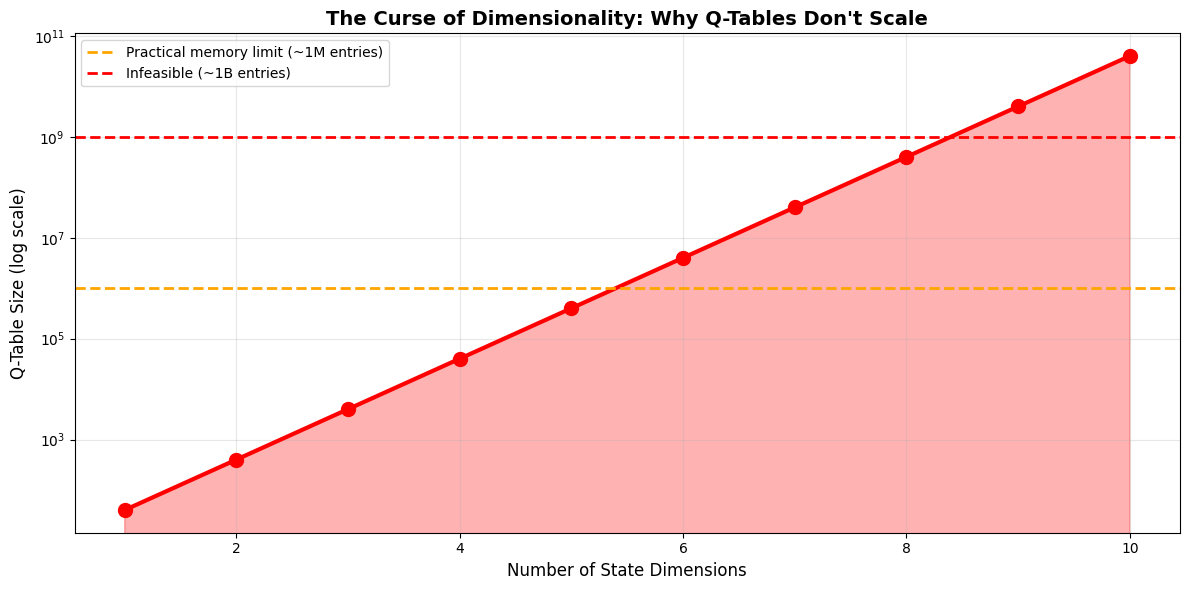

Q-tables grow exponentially with state dimensions!
This is why Deep Q-Networks (DQN) use neural networks instead


In [7]:
# Visualize scalability problem
state_dims = np.arange(1, 11)
states_per_dim = 10
actions = 4

table_sizes = (states_per_dim ** state_dims) * actions

fig, ax = plt.subplots(figsize=(12, 6))

ax.semilogy(state_dims, table_sizes, 'ro-', linewidth=3, markersize=10)
ax.fill_between(state_dims, table_sizes, alpha=0.3, color='red')

# Add threshold line
ax.axhline(y=1e6, color='orange', linestyle='--', linewidth=2, 
           label='Practical memory limit (~1M entries)')
ax.axhline(y=1e9, color='red', linestyle='--', linewidth=2, 
           label='Infeasible (~1B entries)')

ax.set_xlabel('Number of State Dimensions', fontsize=12)
ax.set_ylabel('Q-Table Size (log scale)', fontsize=12)
ax.set_title('The Curse of Dimensionality: Why Q-Tables Don\'t Scale', 
             fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

print("Q-tables grow exponentially with state dimensions!")
print("This is why Deep Q-Networks (DQN) use neural networks instead")

---

## Implementation

Here's the basic Q-Learning implementation pattern:

In [8]:
import numpy as np

# Initialize
n_states = 9
n_actions = 4
Q = np.zeros((n_states, n_actions))
alpha = 0.1    # Learning rate
gamma = 0.9    # Discount factor
epsilon = 0.9  # Exploration rate
n_episodes = 1000

# Simulated environment (you'd replace this with real env)
class SimpleEnv:
    def reset(self):
        return 0  # Start state
    
    def step(self, action):
        next_state = np.random.randint(0, n_states)
        reward = np.random.randn()
        done = np.random.rand() < 0.1
        return next_state, reward, done

env = SimpleEnv()

# Training loop
for episode in range(n_episodes):
    state = env.reset()
    done = False
    
    while not done:
        # ε-greedy action selection
        if np.random.random() < epsilon:
            action = np.random.choice(n_actions)
        else:
            action = np.argmax(Q[state])
        
        # Take action
        next_state, reward, done = env.step(action)
        
        # Q-Learning update
        Q[state, action] += alpha * (
            reward + gamma * np.max(Q[next_state]) 
            - Q[state, action]
        )
        
        state = next_state
    
    # Decay exploration
    epsilon = max(0.01, epsilon * 0.995)

print("Training complete!")
print(f"Final Q-table shape: {Q.shape}")
print(f"Sample Q-values:\n{Q[:3]}")

Training complete!
Final Q-table shape: (9, 4)
Sample Q-values:
[[ 0.18073522 -0.20153471 -0.28017769 -0.26317654]
 [-0.12296255 -0.08897744 -0.10175137  0.42951123]
 [-0.33532505  0.21660505 -0.28126292 -0.15525469]]



---

## Key Takeaways

1. **Q-Learning learns action values (Q-values)** that estimate total future reward

2. **The update rule uses temporal difference**: adjust estimates based on observed outcomes

3. **Balancing exploration and exploitation is crucial** for learning

4. **Q-Learning is off-policy**: learns optimal behavior while acting sub-optimally

5. **Works great for discrete state/action spaces**; needs extensions (like DQN) for complex environments

---

## Next Steps

To deepen your understanding:
- Implement Q-Learning on a simple environment (like FrozenLake from OpenAI Gym)
- Experiment with different hyperparameters and observe their effects
- Try SARSA (on-policy alternative to Q-Learning)
- Learn about Deep Q-Networks (DQN) for handling large state spaces